# SModelS – a tool for interpreting simplified-model results from the LHC

 <img src=https://smodels.github.io/images/banner720.png />

Jan Heisig and Andre Lessa, for the SModelS collaboration.

Re-Interpretation Workshop 2021, February 2021. Updated for SModelS 2.3.2 by WW, Sept 2023.

## Preparatory step -- installation:

### Check the installation instructions [here](https://indico.cern.ch/event/982553/contributions/4220784/attachments/2184008/3700911/smodels-installation.pdf) or install via pip:

In [1]:
# smodels is registered at the python packaging index
!pip3 install --upgrade smodels==2.3.2

  Using cached smodels-2.3.2-py3-none-any.whl
  Attempting uninstall: smodels
    Found existing installation: smodels 2.3.1
    Not uninstalling smodels at /home/walten/git/smodels, outside environment /home/walten/.venvs/311
    Can't uninstall 'smodels'. No files were found to uninstall.


### Fetch the parameters.ini file for colab

In [2]:
!test -e parameters.ini || wget https://raw.githubusercontent.com/SModelS/tutorials/main/parameters.ini

### Check installation:

In [3]:
!runSModelS.py --help

usage: runSModelS.py [-h] -f FILENAME [-p PARAMETERFILE] [-o OUTPUTDIR] [-d]
                     [-t] [-C] [-V] [-c] [-v VERBOSE] [-T TIMEOUT]

Run SModelS over SLHA/LHE input files.

options:
  -h, --help            show this help message and exit
  -f FILENAME, --filename FILENAME
                        name of SLHA or LHE input file or a directory path
                        (required argument). If a directory is given, loop
                        over all files in the directory
  -p PARAMETERFILE, --parameterFile PARAMETERFILE
                        name of parameter file, where most options are defined
                        (optional argument). If not set, use all parameters
                        from smodels/etc/parameters_default.ini
  -o OUTPUTDIR, --outputDir OUTPUTDIR
                        name of output directory (optional argument). The
                        default folder is: ./results/
  -d, --development     if set, SModelS will run in development mode and e

In [4]:
!runSModelS.py -f slhaFiles/simplyGluino.slha -p parameters.ini

INFO in databaseObj.loadBinaryFile() in 505: loading binary db file /home/walten/.cache/smodels/official230.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 512: Loaded database from /home/walten/.cache/smodels/official230.pcl in 2.0 secs.
INFO in modelTester.testPoints() in 341: Running SModelS for a single file
INFO in model.updateParticles() in 394: Loaded 62 BSM particles
INFO in model.updateParticles() in 394: Loaded 62 BSM particles
Input status: 1
Decomposition output status: 1 #decomposition was successful
# Input File: slhaFiles/simplyGluino.slha
# checkinput = True
# combinesrs = False
# computestatistics = True
# docompress = True
# doinvisible = True
# maxcond = 0.2
# minmassgap = 5.
# model = share.models.mssm
# ncpus = 1
# promptwidth = 1e-8
# sigmacut = 0.5
# stablewidth = 1e-25
# testcoverage = True
# SModelS version: 2.3.2
# Database version: 2.3.0
||                                                        ||
||                 Theory Predictions and      

## First Step: Run SModelS for a single file

In [5]:
!runSModelS.py -p parameters.ini -f slhaFiles/wino_11010599.slha

INFO in databaseObj.loadBinaryFile() in 505: loading binary db file /home/walten/.cache/smodels/official230.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 512: Loaded database from /home/walten/.cache/smodels/official230.pcl in 1.4 secs.
INFO in modelTester.testPoints() in 341: Running SModelS for a single file
INFO in model.updateParticles() in 394: Loaded 62 BSM particles
INFO in model.updateParticles() in 394: Loaded 62 BSM particles
Input status: 1
Decomposition output status: 1 #decomposition was successful
# Input File: slhaFiles/wino_11010599.slha
# checkinput = True
# combinesrs = False
# computestatistics = True
# docompress = True
# doinvisible = True
# maxcond = 0.2
# minmassgap = 5.
# model = share.models.mssm
# ncpus = 1
# promptwidth = 1e-8
# sigmacut = 0.5
# stablewidth = 1e-25
# testcoverage = True
# SModelS version: 2.3.2
# Database version: 2.3.0
||                                                        ||
||                 Theory Predictions and     

## Second Step: Run SModelS for multiple files

In [6]:
!runSModelS.py -p parameters_idm.ini -f slhaFiles/IDM_points -o results/IDM_output

INFO in databaseObj.loadBinaryFile() in 505: loading binary db file /home/walten/.cache/smodels/official230.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 512: Loaded database from /home/walten/.cache/smodels/official230.pcl in 1.4 secs.
INFO in modelTester.testPoints() in 348: Running SModelS for 249 files with a single process. Messages will be redirected to smodels.log


## Third Step: plot the results

### Plot IDM results

In [7]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pyslha
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imp,glob,os
cm = matplotlib.colormaps.get_cmap('RdYlBu')

/tmp/ipykernel_291707/2138273509.py:7: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp,glob,os


### Define path to SLHA and results folders

In [8]:
slhaFolder = './slhaFiles/IDM_points'
resultsFolder = './results/IDM_output'

### Read SModelS results

In [9]:
#Convert Experimental Results list to a dictionary
data = []
for f in glob.glob(resultsFolder+'/*.py'):
    smodelsDict = imp.load_source(f.replace('.py',''),f).smodelsOutput
    slhaFile = os.path.basename(smodelsDict['OutputStatus']['input file'])
    slhaFile = os.path.join(slhaFolder,slhaFile)
    #Read SLHA file (using pyslha):
    slhaData = pyslha.readSLHAFile(slhaFile)
    data.append((slhaData,smodelsDict))

In [10]:
mHc = []
ctau = []
r = []
for slhaData,smodelsDict in data:
    if not 'ExptRes' in smodelsDict: #If no results were applicable, point is allowed
        rmax = 0.0
    else:
        rmax = smodelsDict['ExptRes'][0]['r'] #First result is the most constraining
    mass = slhaData.blocks['MASS'][37] #H+ mass
    width = slhaData.decays[37].totalwidth #H+ mass
    if width:    
        ct = 1.967e-16/width
    else:
        ct = 1e7
    
    mHc.append(mass)
    ctau.append(ct)
    r.append(rmax)

### Plot results:

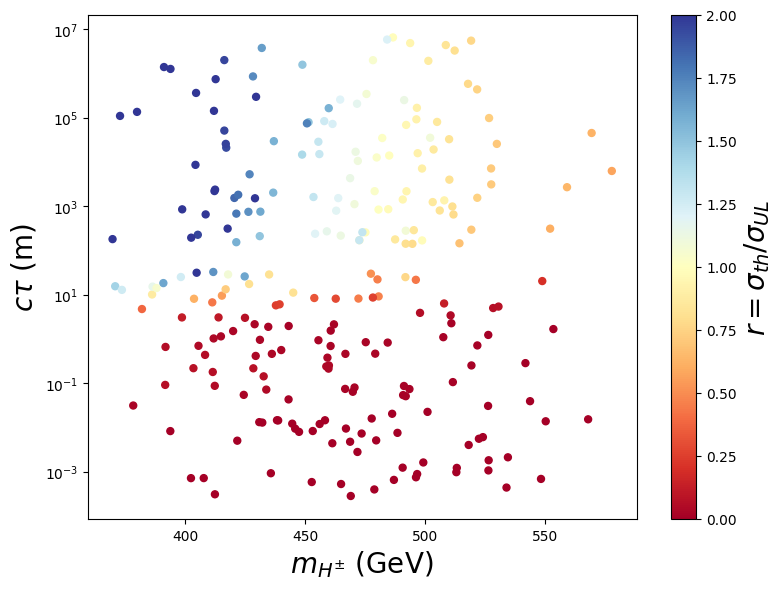

In [11]:
plt.figure(figsize=(8,6))
cp = plt.scatter(mHc,ctau, c=r, vmin=0., vmax=2., s=25, cmap=cm)
cb = plt.colorbar(cp)
plt.yscale('log')
plt.xlabel(r'$m_{H^{\pm}}$ (GeV)',fontsize=20)    
plt.ylabel(r'$c\tau$ (m)',fontsize=20)
cb.set_label(r'$r=\sigma_{th}/\sigma_{UL}$',fontsize=20)
plt.tight_layout()
plt.show()